In [1]:
import json
import pandas as pd
import re
from pathlib import Path

In [2]:
pd.set_option('max_colwidth', 800)

In [3]:
reddit = pd.read_json('../data/reddit_jokes.json', orient='records')

In [4]:
reddit.shape

(194553, 4)

In [5]:
reddit.head()

,body,id,score,title
0,"Now I have to say ""Leroy can you please paint the fence?""",5tz52q,1,I hate how you cant even say black paint anymore
1,Pizza doesn't scream when you put it in the oven .\n\nI'm so sorry.,5tz4dd,0,What's the difference between a Jew in Nazi Germany and pizza ?
2,"...and being there really helped me learn about American culture. So I visited a shop and as I was leaving, the Shopkeeper said ""Have a nice day!"" But I didn't so I sued him.",5tz319,0,I recently went to America....
3,"A Sunday school teacher is concerned that his students might be a little confused about Jesus, so he asks his class, “Where is Jesus today?”\nBrian raises his hand and says, “He’s in Heaven.”\n\nSusan answers, “He’s in my heart.”\n\nLittle Johnny waves his hand furiously and blurts out, “He’s in our bathroom!”\n\nThe teacher is surprised by this answer and asks Little Johnny how he knows this.\n\n“Well,” Little Johnny says, “every morning, my Dad gets up, bangs on the bathroom door and yells ‘Jesus Christ, are you still in there?'”",5tz2wj,1,"Brian raises his hand and says, “He’s in Heaven.”"
4,He got caught trying to sell the two books to a freshman.,5tz1pc,0,"You hear about the University book store worker who was charged for stealing $20,000 worth of books?"


In [6]:
# maybe remove jokes with scores below some threshold?

In [7]:
reddit.query('score > 0').shape

(132992, 4)

In [8]:
reddit.query('score == 0').sample(5)

,body,id,score,title
167120,They're called Grapes of Wrath.,2eyhov,0,Did you guys hear about the new metal band playing at the winery this evening?
60918,What do the teenagers call the Asian red light district?\nVachina Town,49uwnp,0,WHAT DO THE TEENAGERS CALL......
96382,"Why do people throw coins into fountains? I don't know, doesn't make any cents.",3nbro0,0,Why do people throw coins into foutains?
180301,How to hide your important files from people without making Hidden folders\n\n1. Go to Desktop and create a new folder\n\n2. Name the folder Internet Explorer\n\n3. Change the folder icon to Internet Explorer\n\n4. Keep it in a corner of the desktop\n\nnow no one will open internet explorer.,1y2fdg,0,How to hide your important files from people without making Hidden folders.
169297,...because it was absolutely incredible.,2d88w0,0,I watched this documentary the other day but I didn't like it...


In [9]:
dup = reddit[reddit.duplicated(subset=['body', 'title'])]

In [10]:
dup.shape

(3144, 4)

In [11]:
dup.head(3)

,body,id,score,title
1862,Keep the tip.,5swmk6,41,What did the leper say to the prostitute?
2826,The drug mule.,5se328,5,What is Mexico's National Animal?
3047,and a table... and a chair.,5s9dyp,36,A blind man walks into a bar...


In [12]:
reddit[reddit['body'] == 'Keep the tip']

,body,id,score,title
4895,Keep the tip,5rawy1,6,What did the leper say to the prostitute?
12265,Keep the tip,5179kb,5,What did the leper say to the hooker?
17586,Keep the tip,4yreum,27,What did the leper say the the prostitute?
42140,Keep the tip,4m8kye,21,What did the leper say to the prostitute?
55521,Keep the tip,4dw6y4,10,What did the guy with leprosy say to the prostitute?
59539,Keep the tip,4aqlbq,0,What did the baby Jew say to the Mohel hooker?
59548,Keep the tip,4aqf8r,0,[NSFW] what did the leper say to the hooker?
71918,Keep the tip,41wbhy,5,What did the leper say to the prostitute?
104220,Keep the tip,3in2j3,2,What did the leper say to the prostitute?
110027,Keep the tip,3f3mpa,8,What did the leper say to the prostitute?


In [13]:
# remove the duplicates (keep first occurrence only)
reddit = reddit.drop(dup.index)

In [14]:
reddit.shape

(191409, 4)

In [15]:
# prepend title to body for full joke text
reddit['text'] = reddit['title'].str.cat(reddit['body'], sep=' ')

In [16]:
reddit.sample(3)

,body,id,score,title,text
129144,Because Red Blue Green.,336nl3,23,So Yellow and Green are dating. Why does Yellow hate Red?,So Yellow and Green are dating. Why does Yellow hate Red? Because Red Blue Green.
111663,"really, really bad.",3e373o,0,I have to poop like the Joker...,"I have to poop like the Joker... really, really bad."
189401,"The other day, I was purchasing a television antenna in a major electronics store and was asked by the cashier for my name. \n\n“Why,” I asked. ‘I don’t need a warranty.”\n\n “I have to have it for our records,” explained the cashier.\n\n Fed up with practice of companies gathering as much personal information as possible about their customers, I said, ""Maxine Meriwether Pasquadibisceglie-Jones.”\n\nShe looked at me in utter confusion. “Exucse me?” \n\n""Maxine Meriwether Pasquadibisceglie-Jones.”\n\nThe cashier entered “Maxine M.” into the computer database. “What is your last name?”\n\n “Pasquadibisceglie-Jones'” I pulled out my cell phone and began reading emails.\n\n The cashier asked, “How do you spell that?”\n\n""With a hyphen,"" I said absently\n\n ""Once more?"" she asked.\n\n ""Pasq...",1hi2oh,12,Dealing with Corporate Information Gathering,"Dealing with Corporate Information Gathering The other day, I was purchasing a television antenna in a major electronics store and was asked by the cashier for my name. \n\n“Why,” I asked. ‘I don’t need a warranty.”\n\n “I have to have it for our records,” explained the cashier.\n\n Fed up with practice of companies gathering as much personal information as possible about their customers, I said, ""Maxine Meriwether Pasquadibisceglie-Jones.”\n\nShe looked at me in utter confusion. “Exucse me?” \n\n""Maxine Meriwether Pasquadibisceglie-Jones.”\n\nThe cashier entered “Maxine M.” into the computer database. “What is your last name?”\n\n “Pasquadibisceglie-Jones'” I pulled out my cell phone and began reading emails.\n\n The cashier asked, “How do you spell that?”\n\n""With a hyphen,"" I said a..."


In [17]:
def standardize_characters(text):
    """
    Standardizes characters
    """
    text = re.sub('[\n\t\r]|(&nbsp;)', ' ', text)
    text = re.sub('[˗‐‑‒–—―─ー−]', '-', text)
    text = re.sub('[«»”“„″ˮ]', '"', text)
    text = re.sub('[`´ʻ‘’′]', "'", text)
    text = re.sub('[¸‚]', ',', text)
    text = re.sub('…', '...', text)
    text = re.sub('\.{3,}\s?\.{1,}', '... ', text)
    return text

In [18]:
%%time
reddit['text'] = reddit.text.apply(standardize_characters)

Wall time: 14 s


In [19]:
reddit.sample(5)

,body,id,score,title,text
52342,Reports confirm that the steaks have never been higher.,4ggnti,101,Rescue attempts are being made to save a bull stranded on Mt. Everest,Rescue attempts are being made to save a bull stranded on Mt. Everest Reports confirm that the steaks have never been higher.
142539,A fuckload.,2vmr4l,20,How much money do porn stars make?,How much money do porn stars make? A fuckload.
112977,Because she had no arms.,3d7y5x,0,Why did Sally fall off the swing?,Why did Sally fall off the swing? Because she had no arms.
15479,Usain Bolt can finish a race.\n,4zmbd1,64,What's the difference between Hitler and Usain Bolt?,What's the difference between Hitler and Usain Bolt? Usain Bolt can finish a race.
82614,because I could ride your asymptote to infinity.,3v211z,7,Are you a rational function?,Are you a rational function? because I could ride your asymptote to infinity.


In [20]:
stupid = pd.read_json('../data/stupidstuff.json', orient='records')

In [21]:
stupid.head()

,body,category,id,rating
0,"A blackjack dealer and a player with a thirteen count in his hand\nwere arguing about whether or not it was appropriate to tip the\ndealer.\n\nThe player said, ""When I get bad cards, it's not the dealer's fault.\nAccordingly, when I get good cards, the dealer obviously had nothing\nto do with it so, why should I tip him?""\n\nThe dealer said, ""When you eat out do you tip the waiter?""\n\n""Yes.""\n\n""Well then, he serves you food, I'm serving you cards, so you should\ntip me.""\n\n""Okay, but, the waiter gives me what I ask for. I'll take an eight.""",Children,1,2.63
1,"At a dinner party, several of the guests were arguing whether men or women were more trustworthy. 'No woman,' said one man, scornfully, 'can keep a secret.' 'I don't know about that,' answered a blonde woman guest. 'I have kept my age a secret since I was twenty-one.' 'You'll let it out some day,' the man insisted. 'I hardly think so!' responded the blonde lady. 'When a woman has kept a secret for twenty-seven years, she can keep it forever.'",Blonde Jokes,2,2.57
2,One day this cop pulls over a blonde for speeding. The cop gets out of his car and asks the blonde for her license.''You cops should get it together. One day you take away my license and the next day you ask me to show it.'',Blonde Jokes,3,3.09
3,"Three women are about to be executed for crimes. One's a brunette, one's a redhead, and one's a blonde.Two guards brings the brunette forward, and the executioner asks if she has any last requests. She says no, and the executioner shouts, ""Ready . . . Aim . . .""Suddenly the brunette yells, ""earthquake!!"" Everyone is startled and looks around. She manages to escape.The angry guards then bring the redhead forward, and the executioner asks if she has any last requests. She says no, and the executioner shouts, ""Ready . . . Aim . . .""The redhead then screams, ""tornado!!"" Yet again, everyone is startled and looks around. She too escapes execution.By this point, the blonde had figured out what the others did. The guards bring her forward, and the executioner asks if she has any last requests....",Blonde Jokes,4,4.10
4,"A girl came skipping home FROM school one day. ""Mommy, Mommy,"" she yelled, ""we were counting today, and all the other kids could only count to four, but I counted to 10. See? 1, 2, 3, 4, 5, 6,7, 8, 9, 10!"" ""Very good,"" said her mother. ""Is it because I'm blonde, Mommy?"" ""Yes, Honey, it's because you're blonde."" The next day the girl came skipping home FROM school. ""Mommy, Mommy,"" She yelled, ""we were saying the alphabet today, and all the other kids could only say it to D, but I said it to G. See? A,b, c, d, e, f, g!"" ""Very good,"" said her mother. ""Is it because I'm blonde, Mommy?"" ""Yes, Honey, it's because you're blonde."" The next day the girl came skipping home FROM school. ""Mommy, Mommy,"" she yelled, ""we were in gym class today, and when we showered, all the other girls had flat che...",Blonde Jokes,5,4.30


In [22]:
dup = stupid[stupid.duplicated(subset='body')]

In [23]:
dup.shape

(650, 4)

In [24]:
stupid = stupid.drop(dup.index)

In [25]:
stupid[stupid['body'] == '']

,body,category,id,rating
1728,,Science,1729,4.5


In [26]:
stupid = stupid.drop(1728)

In [27]:
stupid.shape

(3122, 4)

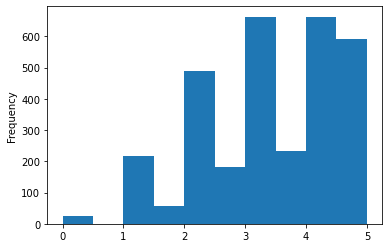

In [28]:
stupid.rating.plot.hist();

In [29]:
%%time
stupid['text'] = stupid.body.apply(standardize_characters)

Wall time: 366 ms


In [30]:
stupid.query('rating < 2').sample(5)

,body,category,id,rating,text
978,"Three older ladies were discussing the travails of getting older. One said, \n""Sometimes I catch myself with a jar of mayonnaise in my hand in front of \nthe refrigerator and can't remember whether I need to put it away, or start \nmaking a sandwich.""\n \nThe second lady chimed in, ""Yes, some times I find myself on the landing \nof the stairs and can't remember whether I was on my way up or on my way \ndown.""\n \nThe third one responded, "" Well, I'm glad I don't have that problem; knock \non wood,"" as she rapped her knuckles on the table, then told them ""That must \nbe the door, I'll get it!""",Miscellaneous,979,1.0,"Three older ladies were discussing the travails of getting older. One said, ""Sometimes I catch myself with a jar of mayonnaise in my hand in front of the refrigerator and can't remember whether I need to put it away, or start making a sandwich."" The second lady chimed in, ""Yes, some times I find myself on the landing of the stairs and can't remember whether I was on my way up or on my way down."" The third one responded, "" Well, I'm glad I don't have that problem; knock on wood,"" as she rapped her knuckles on the table, then told them ""That must be the door, I'll get it!"""
955,"Three friends were backpacking through europe and found out about a magical mountain near the coast, so they decided to check it out.\nWhen they finally reached the top of the mountain they saw a man jump straight off the edge and screamed that he wanted to be an eagle then poof he turned into an eagle and flew away.\nAfter seeing that the three friends got really excited and decided to go for it.The first thought for a second and then dashed straight off and yelled ""I want to be a hawk"" then poof he turned into a hawk and flew away. The second friend thought for a second and finally decided and jumped off and yelled ""I want to be a a mountain goat"" then poof he turned into a mountain goat and ran away. The third friend thought about for a long while and then finally decided, he ran as...",Miscellaneous,956,1.0,"Three friends were backpacking through europe and found out about a magical mountain near the coast, so they decided to check it out. When they finally reached the top of the mountain they saw a man jump straight off the edge and screamed that he wanted to be an eagle then poof he turned into an eagle and flew away. After seeing that the three friends got really excited and decided to go for it.The first thought for a second and then dashed straight off and yelled ""I want to be a hawk"" then poof he turned into a hawk and flew away. The second friend thought for a second and finally decided and jumped off and yelled ""I want to be a a mountain goat"" then poof he turned into a mountain goat and ran away. The third friend thought about for a long while and then finally decided, he ran as f..."
3598,"""Excuse me, sir.""\n""Is that you again, Moses?""\n""I'm afraid it is, sir.""\n""What is it this time, Moses. More computer problems?""\n""How did you guess?""\n""I don't have to guess, Moses. Remember?""\n""Oh, yeah. I forgot.""\n""Tell me what you want, Moses.""\n""But you already know. Remember?""\n""Moses!""\n""Sorry, sir.""\n""Well, go ahead, Moses. Spit it out!""\n""Well, I have a question, Sir. You know those ten things you sent me?""\n""You mean the Commandments, Moses?""\n""That's it. I was wondering if they were important.""\n""What do you mean 'were important, Moses? Of course, they are\nimportant. Otherwise I wouldn't have sent them to you.""\n""Well, sorry, but I lost them. I could say the dog ate them, but of\ncourse you would see right through that.""\n""What do you mean 'you lost them! Are you trying to...",Religious,3599,1.0,"""Excuse me, sir."" ""Is that you again, Moses?"" ""I'm afraid it is, sir."" ""What is it this time, Moses. More computer problems?"" ""How did you guess?"" ""I don't have to guess, Moses. Remember?"" ""Oh, yeah. I forgot."" ""Tell me what you wa

In [31]:
stupid = stupid.rename({'rating': 'score'}, axis=1)

In [32]:
stupid.category.value_counts()

Miscellaneous      701
Men                190
Insults            186
Women              143
Yo Mama            141
Light Bulbs        119
Religious          115
Political          112
Blonde Jokes       111
Heaven and Hell     85
Family, Parents     80
Money               77
Medical             77
Animals             74
Bar Jokes           66
Children            65
Computers           64
Police Jokes        55
Sex                 54
Lawyers             50
Love & Romance      48
Military            47
Crazy Jokes         43
Business            41
Marriage            37
Sports              37
Aviation            35
Holidays            32
Idiots              31
Farmers             27
Redneck             27
School              26
Old Age             22
Office Jokes        18
Science             17
Deep Thoughts       14
Food Jokes          13
Blind Jokes         11
State Jokes          9
Ethnic Jokes         8
Music                7
One Liners           6
English              1
Name: categ

In [33]:
wocka = pd.read_json('../data/wocka.json', orient='records')

In [34]:
wocka.head()

,body,category,id,title
0,What do you call a cow with no legs?\r\n\r\nGround Beef!,Animal,1,Cow With No Legs
1,What do you call a cow jumping over a barbed wire fence?\r\n\r\nUtter destruction.,Animal,2,Jumping Cow
2,What's black and white and red all over?\r\n\r\nA newspaper.,Other / Misc,4,"Black, White and Red"
3,"So, this guy walks into a bar.\r\n\r\nAnd says, ""ouch"".",Bar,5,Guy in a Bar
4,"If the opposite of pro is con, isn't the opposite of progress, congress?",One Liners,6,Progress


In [35]:
dup = wocka[wocka.duplicated(subset='body')]

In [36]:
dup.shape

(8, 4)

In [37]:
wocka = wocka.drop(dup.index)

In [38]:
%%time
wocka['text'] = wocka.body.apply(standardize_characters)

Wall time: 1.52 s


In [39]:
wocka.sample(5)

,body,category,id,title,text
2897,"A man who lived in a block of apartments thought it was raining and put his head out the window to check. As he did so a glass eye fell into his hand. \r\n\r\nHe looked up to see where it came from in time to see a young woman looking down. \r\n\r\n""Is this yours?"" he asked. \r\n\r\nShe said, ""Yes, could you bring it up?"" and the man agreed. \r\n\r\nOn arrival she was profuse in her thanks and offered the man a drink. As she was very attractive he agreed. Shortly afterwards she said, ""I'm about to have dinner. There's plenty. Would you like to join me?"" \r\n\r\nHe readily accepted her offer and both enjoyed a lovely meal. As the evening was drawing to a close the lady said, ""I've had a marvelous evening. Would you like to stay the night?"" \r\n\r\nThe man hesitated then said, ""Do you ac...",Puns,4562,Eye,"A man who lived in a block of apartments thought it was raining and put his head out the window to check. As he did so a glass eye fell into his hand. He looked up to see where it came from in time to see a young woman looking down. ""Is this yours?"" he asked. She said, ""Yes, could you bring it up?"" and the man agreed. On arrival she was profuse in her thanks and offered the man a drink. As she was very attractive he agreed. Shortly afterwards she said, ""I'm about to have dinner. There's plenty. Would you like to join me?"" He readily accepted her offer and both enjoyed a lovely meal. As the evening was drawing to a close the lady said, ""I've had a marvelous evening. Would you like to stay the night?"" The man hesitated then said, ""Do you act like this with every m..."
9634,"Will there be KGB in communism? \r\n\r\nAs you know, in communism, the state will be abolished, together with its means of suppression. People will know how to arrest themselves.",News / Politics,17736,KGB in Communism,"Will there be KGB in communism? As you know, in communism, the state will be abolished, together with its means of suppression. People will know how to arrest themselves."
674,"A Marine was coming home from the Pentagon one day. He noticed that there was a lot more traffic than normal. As he got further up the road all of the traffic had come to a halt. He saw a policeman coming towards his car, so he asked the cop what was wrong. The cop said, ""Man we are in a crisis situation. Mr. Clinton is in the road very upset. He does not have the $33.5 million that he owes his lawyers, and his family hates him. He is threatening to douse himself in gasoline and start a fire."" The marine asked the cop exactly what he was doing there. The cop said, ""I feel sorry for the president so I am going car to car asking for donations."" The marine asked, ""How much do you have so far?"" The cop replied, ""Well as of right now only 33 gallons, but many people are still siphoning as w...",News / Politics,771,Suicide,"A Marine was coming home from the Pentagon one day. He noticed that there was a lot more traffic than normal. As he got further up the road all of the traffic had come to a halt. He saw a policeman coming towards his car, so he asked the cop what was wrong. The cop said, ""Man we are in a crisis situation. Mr. Clinton is in the road very upset. He does not have the $33.5 million that he owes his lawyers, and his family hates him. He is threatening to douse himself in gasoline and start a fire."" The marine asked the cop exactly what he was doing there. The cop said, ""I feel sorry for the president so I am going car to car asking for donations."" The marine asked, ""How much do you have so far?"" The cop replied, ""Well as of right now only 33 gallons, but many people are still siphoning as w..."
2916,"Most people assume WWJD is for ""What would Jesus do?"" But the initials really stand for ""What would Jesus drive?""\r\n\r\nOne theory is that Jesus would tool around in an old Plymouth because the Bible says ""God drove Adam and Eve out of the Garden of Eden in a Fury.""\r\n\r\nBut in Psalm 83, th

In [40]:
wocka.category.value_counts()

Other / Misc       2302
Men / Women         924
One Liners          917
Animal              656
Children            605
Yo Momma            600
Blond               598
Puns                457
Religious           401
At Work             288
News / Politics     279
Insults             276
Gross               253
Redneck             240
Medical             207
Knock-Knock         167
Lawyer              157
Bar                 154
Tech                151
Sports              134
College             131
Lightbulb           110
Yo Mama               3
Blonde                1
Name: category, dtype: int64

In [41]:
wocka[wocka['category'] == 'Insults'].sample(5)

,body,category,id,title,text
3771,"A black female is having trouble with her menses. She goes to the gynecologist and he asks: ""Mrs. Williams, what kind of flow do you have?"" ""Linoleum"" she replies.",Insults,6731,OBGYN Visit,"A black female is having trouble with her menses. She goes to the gynecologist and he asks: ""Mrs. Williams, what kind of flow do you have?"" ""Linoleum"" she replies."
3349,"Roses are red, \r\nViolets are blue.\r\nYo momma is ugly,\r\nAnd she looks just like you.",Insults,5718,A Limerick From Me to You,"Roses are red, Violets are blue. Yo momma is ugly, And she looks just like you."
394,"People say you are the perfect idiot. I say you are not perfect, but you are doing pretty good.",Insults,437,Perfect Idiot,"People say you are the perfect idiot. I say you are not perfect, but you are doing pretty good."
3124,You're so ugly that you scared away a man-eating shark!,Insults,5129,Back Luck,You're so ugly that you scared away a man-eating shark!
1605,"Roses are red,\r\nGrass is green.\r\nYou have the shape\r\nOf a washing machine.",Insults,2312,Rhyme,"Roses are red, Grass is green. You have the shape Of a washing machine."


In [42]:
# reorder columns
reddit = reddit[['text', 'score']]
stupid = stupid[['text', 'score', 'category']]
wocka = wocka[['text', 'category']]

In [43]:
# combine df-s
combined = pd.concat([reddit, stupid, wocka])

In [44]:
combined.shape

(204542, 3)

In [45]:
combined.to_csv('../data/jokes_combined.csv', index=False, encoding='utf-8')